# ML courses 5 & 6 - Practice on logistic regression and classification assessment

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Data preparation

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

**Loading the data set from Scikit-Learn**

In [194]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**   
Sklearn returns the dataset in the form of a dictionary. The actual dataset is stored under 'data', but there are other keys that give access to more information.

In [195]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

**Getting a description of the data set**

In [196]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [197]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [198]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [199]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


In [200]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

**To make it easier to do visual check of the data, we remove the encoding**

In [201]:
target = target.replace({0:data_all.target_names[0], 1:data_all.target_names[1]})
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


## Your Mission

We have here a large data set that could help predict if a tumor is benign or malignant based on its characteristics. In this work, we will focus on a small number of predictors that we will use to train and assess logistic regressions.

<font color=red><b>Questions in red have to be answered only after lecture session 6 (classification assessment).</font>

* We check at first if the tumor radius is a good predictor for breast cancer.
  1. Perform data exploration on mean radius, taking into account the target class attributions. Do you think mean radius can make an good predictor of tumor type?
  2. Encode the target variable ("tumor type") and make sure you code 0 as 'benign' and 1 as 'malignant'.
  3. Plot the target variable with respect to mean radius (scatter plot). Do you think a logistic regression model can model the relationship between the two variables reasonably well? Why or why not?    
  4. Train a logistic regression model.
  5. Reproduce the plot you made in question (3) and add a curve to show the probability of having a malignant tumor for any value of _mean radius,_ according to your logistic regression model.  
  More formally: $P\left( Y=1 \left| X=x \right. \right)$ _where $Y$ is the tumor type and $x$ is the mean radius._
  6. According to your model, what is the minimum _mean radius_ value for considering that the tumor is malignant?  
  Make a few predictions with your model with different values of _mean radius_ to check your intuition.
  7. <font color=red>Compute and display the confusion matrix. Compute the accuracy, precision and recall "by hand" from the confusion matrix. Compute the f1-score as well.  
Comment your results. What can you say about your model's performance?</font> 
  8. <font color=red>Imagine that we want to make the diagnosis of breast cancer to be able to treat it if necessary. Should we better focus on increasing the recall or the precision of the prediction? And why?  
    How can we adapt the output of the model to modify the precision/recall of the prediction in this regard?</font>  
  9. <font color=red>BONUS: Tweak your model's prediction the way you proposed in your answer of question 8. Show results demonstrating if its predictions have become more appropriate for cancer diagnosis. Comment your results.</font>
* We decide to add an extra predictor to our model.
  10. Inspect the data in order to tell —  between mean texture, mean perimeter, and mean area — which is the most relevant predictor to choose (in addition to mean radius).
  11. Re-train your logistic regression with your two predictors (mean radius and the one you have picked).
  12. <font color=red>How has the classification performance increased?</font>
* Comparison of the two models: 
  13. <font color=red>Plot the ROC curves of the two previous models and make the comparison.</font> 
  14. <font color=red>Compute the LogLoss values of the two previous models and make the comparison.</font> 

#### 1.Perform data exploration on mean radius, taking into account the target class attributions. Do you think mean radius can make an good predictor of tumor type?

In [211]:
dataset = pd.merge(features, target, left_index=True, right_index=True)
dataset.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor type
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208,benign
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790,malignant
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584,benign
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938,malignant
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165,malignant
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619,malignant
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251,malignant
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558,malignant


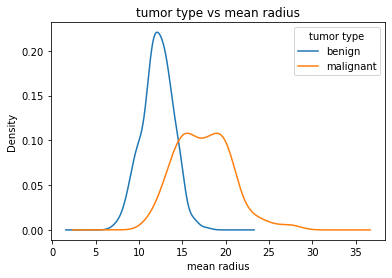

In [212]:
dataset.groupby('tumor type')['mean radius'].plot(kind='density')

plt.title('tumor type vs mean radius')
plt.xlabel('mean radius')
plt.legend(['benign', 'malignant'], title = 'tumor type')
plt.show()

According to the plot, I think mean radius is a good predictor of tumor type.

#### 2.Encode the target variable ("tumor type") and make sure you code 0 as 'benign' and 1 as 'malignant'.

In [213]:
dataset['tumor type'].sample(n=8, random_state=1)

421       benign
47     malignant
292       benign
186    malignant
414    malignant
132    malignant
161    malignant
197    malignant
Name: tumor type, dtype: object

In [214]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['tumor type'] = label_encoder.fit_transform(dataset['tumor type'])
dataset['tumor type'].sample(n=8, random_state=1)

421    0
47     1
292    0
186    1
414    1
132    1
161    1
197    1
Name: tumor type, dtype: int64

#### 3.Plot the target variable with respect to mean radius (scatter plot). Do you think a logistic regression model can model the relationship between the two variables reasonably well? Why or why not?

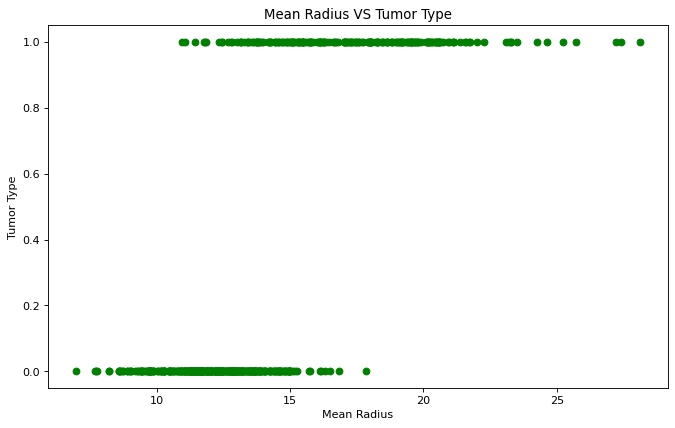

In [215]:
X = dataset['mean radius'].values.reshape(-1, 1)
y = dataset['tumor type'].values

plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(dataset['mean radius'], dataset['tumor type'], c='green')
plt.xlabel("Mean Radius")
plt.ylabel("Tumor Type")
plt.title("Mean Radius VS Tumor Type")
plt.show()

I think a logistic regression model can model the relationship between the two variables reasonably well. Because we can see eacch catogories has a strong correlation with mean radius in the plot. Logistic regression will models the probabilities for the classification.

#### 4.Train a logistic regression model.

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 1) (426,)
Test set: (143, 1) (143,)


In [217]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [218]:
X_train[:10]

array([[-0.65079907],
       [-0.82835341],
       [ 1.68277234],
       [-0.16041087],
       [ 0.71326925],
       [-0.59161428],
       [-0.08149783],
       [-0.45069814],
       [ 0.02841677],
       [-1.44584797]])

In [219]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

5.Reproduce the plot you made in question (3) and add a curve to show the probability of having a malignant tumor for any value of mean radius, according to your logistic regression model.
More formally:  𝑃(𝑌=1|𝑋=𝑥)  where  𝑌  is the tumor type and  𝑥  is the mean radius.

(0.5, 1.05)

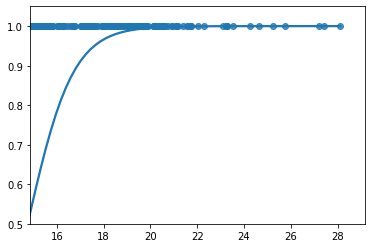

In [220]:
import seaborn as sns
sns.regplot(x=X, y=Y, data=dataset, logistic=True, ci=None)
plt.xlim(14.86, None)
plt.ylim(0.5, None)

#### 6.According to your model, what is the minimum mean radius value for considering that the tumor is malignant?Make a few predictions with your model with different values of mean radius to check your intuition.

In [221]:
arr = dataset['mean radius'].values
list = []
for i in arr:
    if classifier.predict(sc.transform([[i]])) == 1:
        list.append(i)
print(f'The minimum mean radius value for considering that the tumor is malignant is: {min(list)}')

The minimum mean radius value for considering that the tumor is malignant is: 14.86


In [222]:
print(label_encoder.inverse_transform(classifier.predict(sc.transform([[14.69]]))))

['benign']


In [223]:
print(label_encoder.inverse_transform(classifier.predict(sc.transform([[18.31]]))))

['malignant']


#### 7.Compute and display the confusion matrix. Compute the accuracy, precision and recall "by hand" from the confusion matrix. Compute the f1-score as well.Comment your results. What can you say about your model's performance?

In [224]:
y_proba = classifier.predict_proba(X_test)
y_proba[:10]

array([[0.77864652, 0.22135348],
       [0.80627905, 0.19372095],
       [0.67015463, 0.32984537],
       [0.62161353, 0.37838647],
       [0.82996408, 0.17003592],
       [0.95612735, 0.04387265],
       [0.9207811 , 0.0792189 ],
       [0.94063649, 0.05936351],
       [0.99812743, 0.00187257],
       [0.98266889, 0.01733111]])

In [225]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),axis=1)[:10])

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [226]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  6]
 [ 8 45]]


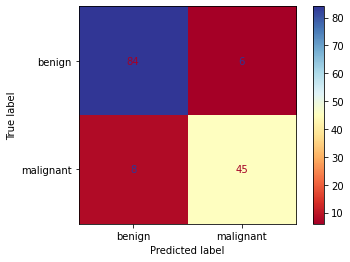

In [227]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay(cm, display_labels=["benign", "malignant"]).plot(cmap='RdYlBu')

In [232]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, y_pred),2)))
print('Precision (proportion of malignant among tumor predictions) is ' + str(round(precision_score(y_test, y_pred),2)))
print('Recall (proportion of malignant that are correctly predicted) is ' + str(round(recall_score(y_test, y_pred),2)))
print('F1 score (combined measure of precision and recall) is ' + str(round(f1_score(y_test, y_pred), 2)))

Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of malignant among tumor predictions) is 0.88
Recall (proportion of malignant that are correctly predicted) is 0.85
F1 score (combined measure of precision and recall) is 0.87


8.Imagine that we want to make the diagnosis of breast cancer to be able to treat it if necessary. Should we better focus on increasing the recall or the precision of the prediction? And why?
How can we adapt the output of the model to modify the precision/recall of the prediction in this regard?

For that purpose, we should better focus on increasing the recall. Because a high recall means we can found the cancer precisely and treat it in time. We should decrese false negative.

9.BONUS: Tweak your model's prediction the way you proposed in your answer of question 8. Show results demonstrating if its predictions have become more appropriate for cancer diagnosis. Comment your results

#### 10.Inspect the data in order to tell — between mean texture, mean perimeter, and mean area — which is the most relevant predictor to choose (in addition to mean radius).

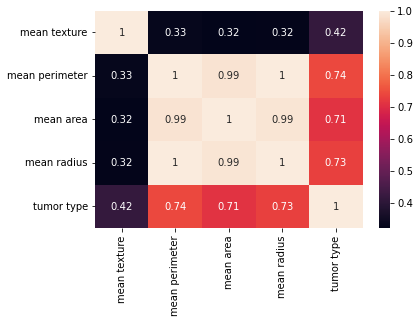

In [233]:
feature_list = dataset[['mean texture', 'mean perimeter', 'mean area', 'mean radius', 'tumor type']]
correlation = feature_list.corr()
_ = sns.heatmap(correlation, annot=True)

From the correlation heatmap, we can see mean perimeter is the most relevant predictor.

#### 11.Re-train your logistic regression with your two predictors (mean radius and the one you have picked).

In [234]:
X1 = dataset[['mean radius', 'mean perimeter']].values
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.25, random_state = 0)
print ('Train set:', X1_train.shape,  y1_train.shape)
print ('Test set:', X1_test.shape,  y1_test.shape)

Train set: (426, 2) (426,)
Test set: (143, 2) (143,)


In [235]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [236]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()
classifier1.fit(X1_train, y1_train)

LogisticRegression()

#### 12.How has the classification performance increased?

In [237]:
y1_proba = classifier1.predict_proba(X1_test)
y1_proba[:10]

array([[0.75033036, 0.24966964],
       [0.84178953, 0.15821047],
       [0.7106149 , 0.2893851 ],
       [0.66124945, 0.33875055],
       [0.86712781, 0.13287219],
       [0.96431731, 0.03568269],
       [0.9225708 , 0.0774292 ],
       [0.95510032, 0.04489968],
       [0.99886553, 0.00113447],
       [0.98574973, 0.01425027]])

In [238]:
y1_pred = classifier1.predict(X1_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y1_test, y1_pred),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, y1_pred),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y1_test, y1_pred),2)))
print('F1 score (combined measure of precision and recall) is ' + str(round(f1_score(y1_test, y1_pred), 2)))

Accuracy (proportion of correct predictions) is 0.92
Precision (proportion of true purchases among purchase predictions) is 0.9
Recall (proportion of true purchases that are correctly predicted) is 0.87
F1 score (combined measure of precision and recall) is 0.88


#### 13.Plot the ROC curves of the two previous models and make the comparison.

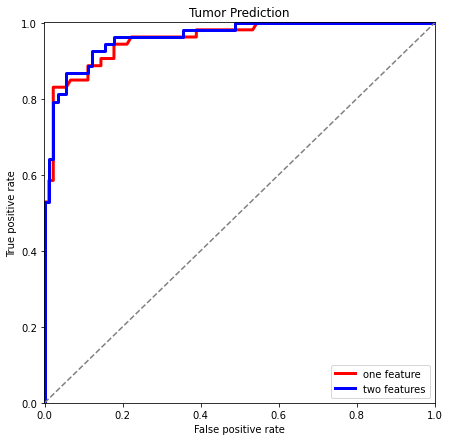

In [239]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score = y_proba[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

y1_score = y1_proba[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y1_test, y1_score)

fig, ax = plt.subplots(1, figsize=(7,7))
plt.plot(false_positive_rate, true_positive_rate, c='red', linewidth=3)
plt.plot(false_positive_rate1, true_positive_rate1, c='blue', linewidth=3)

plt.title('Tumor Prediction')
plt.plot([0, 1], ls="--", c='grey')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend(['one feature', 'two features'])

plt.show()

In [240]:
print('AUC: ', roc_auc_score(y_test, y_score))

AUC:  0.9575471698113208


In [241]:
print('AUC: ', roc_auc_score(y1_test, y1_score))

AUC:  0.9626834381551362


The second model has a higher accuracy.

#### 14.Compute the LogLoss values of the two previous models and make the comparison.

In [242]:
y_true = y_test
y1_true = y1_test
def logloss(y_true, y_pred, eps = 1e-15):
    assert (len(y_true) and len(y_true) == len(y_pred))
    p = np.clip(y_pred, eps, 1-eps)
    loss = np.sum(-y_true * np.log(p) - (1-y_true) * np.log(1-p))
    return loss/len(y_true)
    
logloss(y_true, y_pred)

3.38145221757574

In [243]:
logloss(y1_true, y1_pred)

2.8983868162662882

Loss value decreased. That means our result is more accurate.